<a href="https://colab.research.google.com/github/okwach-01/okwach-01-Final-KCB-AICE-course-project/blob/main/Predicting_Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Description: Predicting Machine Failures

#### Overview
This project aims to develop a predictive model to determine the likelihood of machine failures based on various operational and environmental parameters. By analyzing historical data, we seek to identify patterns and key factors that contribute to machine breakdowns, enabling more proactive and efficient maintenance strategies.

#### Objectives
- **Develop a Predictive Model**: Build a binary classification model to predict machine failures.
- **Identify Key Factors**: Understand the operational and environmental conditions that most significantly impact machine reliability.
- **Improve Maintenance**: Provide actionable insights to optimize maintenance schedules and reduce unexpected machine downtimes.

#### Dataset
The dataset includes the following columns:

- **id**: Unique identifier for each data point.
- **Product ID**: Identifier for different types or models of machines.
- **Type**: Category of the machine (e.g., 'L', 'M').
- **Air temperature [K]**: Air temperature in Kelvin during machine operation.
- **Process temperature [K]**: Process temperature in Kelvin during machine operation.
- **Rotational speed [rpm]**: Machine's rotational speed in revolutions per minute.
- **Torque [Nm]**: Torque exerted by the machine in Newton-meters.
- **Tool wear [min]**: Duration of tool usage in minutes.
- **Machine failure**: Binary indicator of machine failure (1 = failure, 0 = no failure).
- **TWF**: Tool Wear Failure indicator.
- **HDF**: Heat Dissipation Failure indicator.
- **PWF**: Power Failure indicator.
- **OSF**: Overstrain Failure indicator.
- **RNF**: Random Failure indicator.

The dataset is split into:
- **train.csv**: Training data with the target variable (machine failure).
- **test.csv**: Test data without the target variable, used for making predictions.

#### Methodology
1. **Data Preprocessing**:
   - Handle missing values and outliers.
   - Normalize/standardize continuous variables (e.g., temperatures, rotational speed, torque, tool wear).
   - Encode categorical variables (e.g., machine type).

2. **Feature Engineering**:
   - Create new features or transform existing ones to enhance model performance.
   - Consider interactions between variables.

3. **Model Selection**:
   - Experiment with various classification algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting, Neural Networks).
   - Use cross-validation to evaluate model performance and prevent overfitting.

4. **Model Training and Evaluation**:
   - Train models on the training dataset.
   - Evaluate models using metrics like accuracy, precision, recall, F1 score, and ROC-AUC.
   - Select the best-performing model based on evaluation metrics.

5. **Prediction and Submission**:
   - Use the best model to predict machine failure probabilities on the test dataset.
   - Prepare a submission file with the predicted probabilities.

#### Expected Outcomes
- **Accurate Predictions**: A reliable model for predicting machine failures.
- **Insightful Analysis**: Identification of key factors contributing to machine failures.
- **Preventive Measures**: Enhanced maintenance strategies to reduce downtime and improve machine performance.

#### Applications
- **Predictive Maintenance**: Enabling proactive maintenance schedules to prevent unexpected failures.
- **Operational Efficiency**: Optimizing machine performance and reducing downtime.
- **Cost Savings**: Lowering maintenance costs and improving resource allocation.

By leveraging data-driven insights, this project aims to enhance the reliability and efficiency of machine operations, ultimately leading to improved industrial performance and reduced operational risks.

In [ ]:
#import paskages
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix

In [ ]:
#load train data
train_data = pd.read_csv('train.csv.zip')

In [ ]:
#load test data
test_data = pd.read_csv('test.csv.zip')

In [ ]:
#print head data
train_data.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
#summary statistics of numerical features
print("Summary statistics of numerical features:")
train_data.describe()


Summary statistics of numerical features:


,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#information about the dataset
print("Information about the dataset:")
train_data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136

In [ ]:
#check is null data
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
#value count for target data
train_data['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

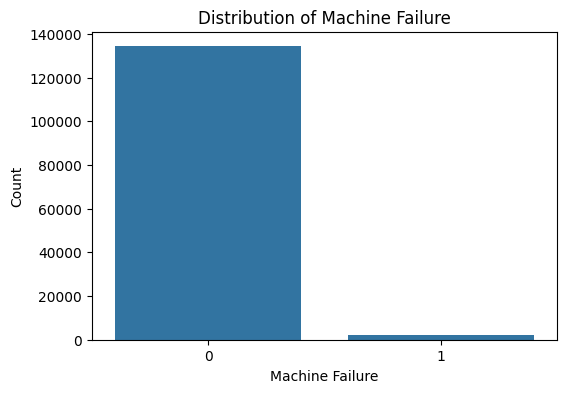

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=train_data)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

###### The data is imbalanced

will using the Random Oversampling technique to increase the instances of the minority class

In [ ]:
# Define X (features) and y (target)
X = train_data .drop(columns=['Machine failure'])
y = train_data ['Machine failure']

# Random Oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create DataFrame with resampled data
train_data = pd.DataFrame(X_resampled, columns=X.columns)
train_data['Machine failure'] = y_resampled



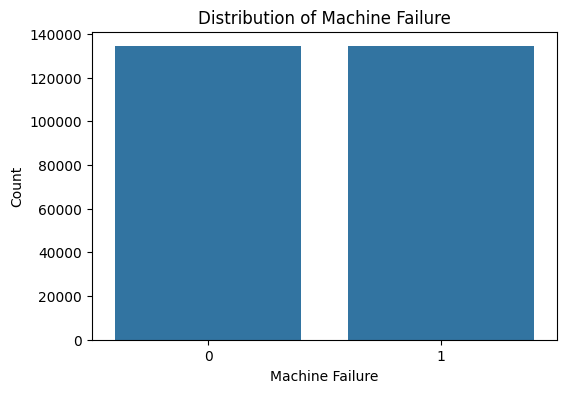

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine failure', data=train_data)
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()


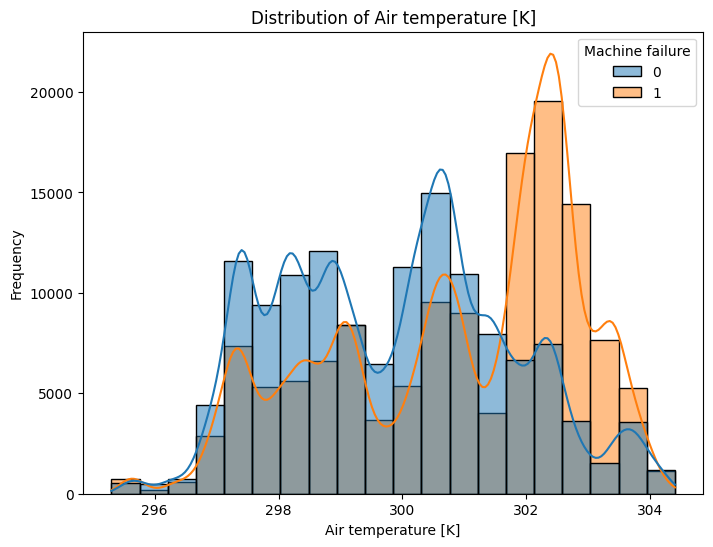

In [ ]:
#Distribution of Air temperature [K]

plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Air temperature [K]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Air temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Frequency')
plt.show()

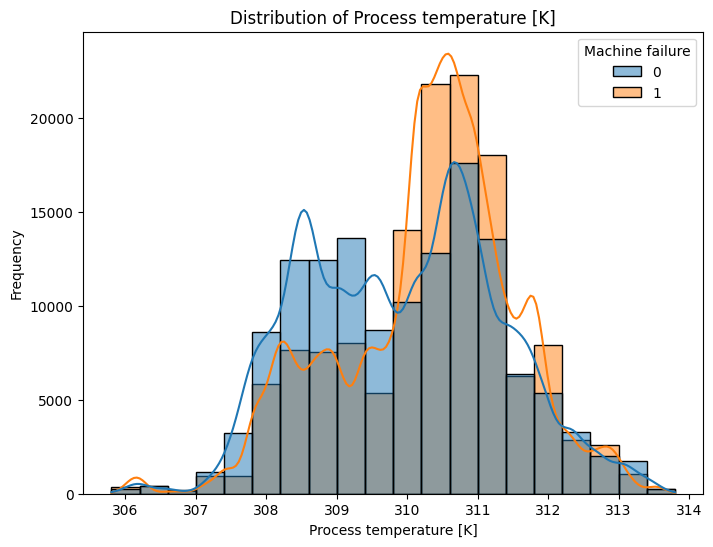

In [ ]:
#Distribution of Process temperature [K]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Process temperature [K]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Process temperature [K]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Frequency')
plt.show()

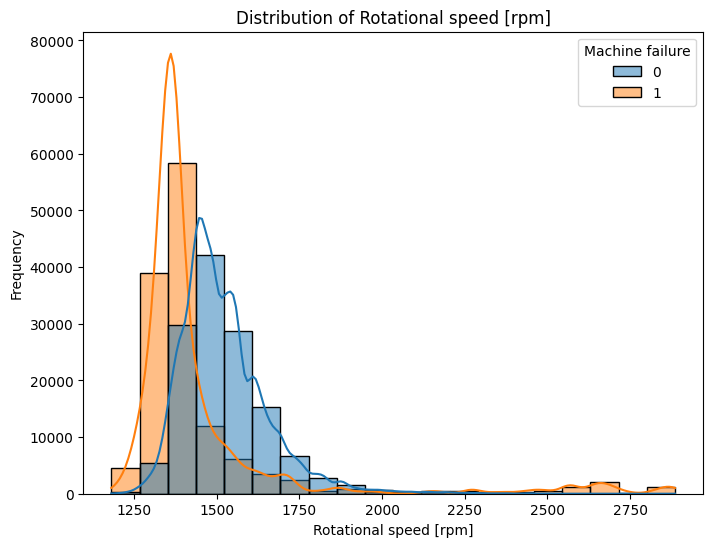

In [ ]:
# Distribution of Rotational speed [rpm]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Rotational speed [rpm]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Rotational speed [rpm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Frequency')
plt.show()


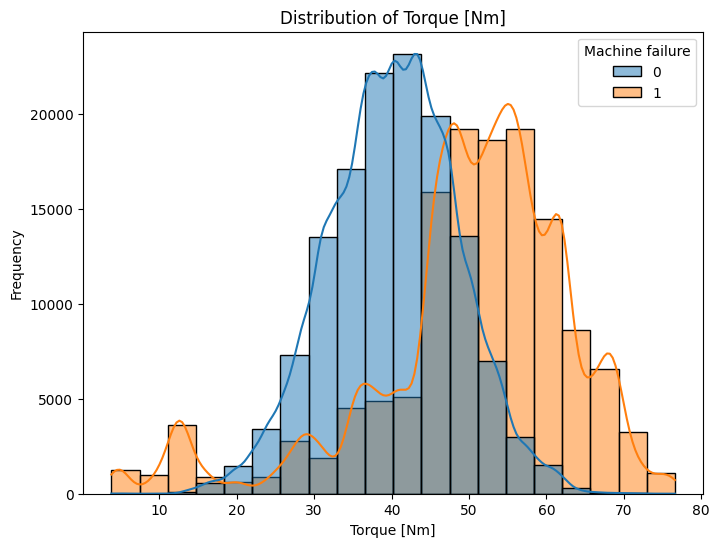

In [ ]:
#Distribution of Torque [Nm]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Torque [Nm]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.show()

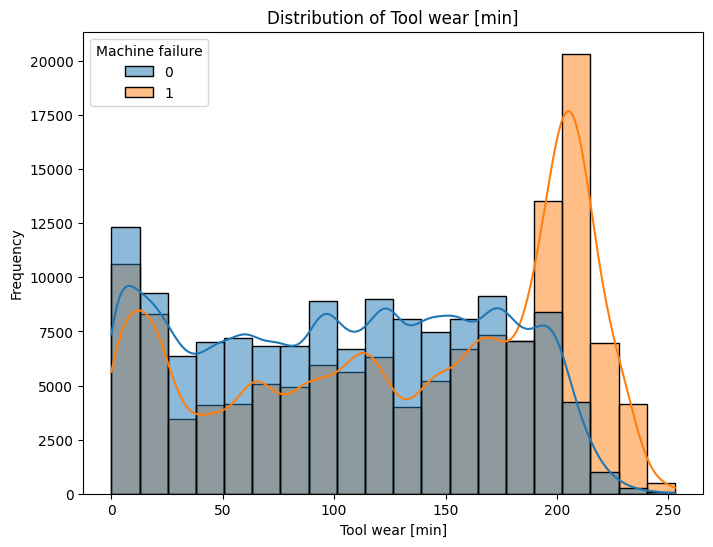

In [ ]:
#Distribution of Tool wear [min]
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Tool wear [min]', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Tool wear [min]')
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequency')
plt.show()


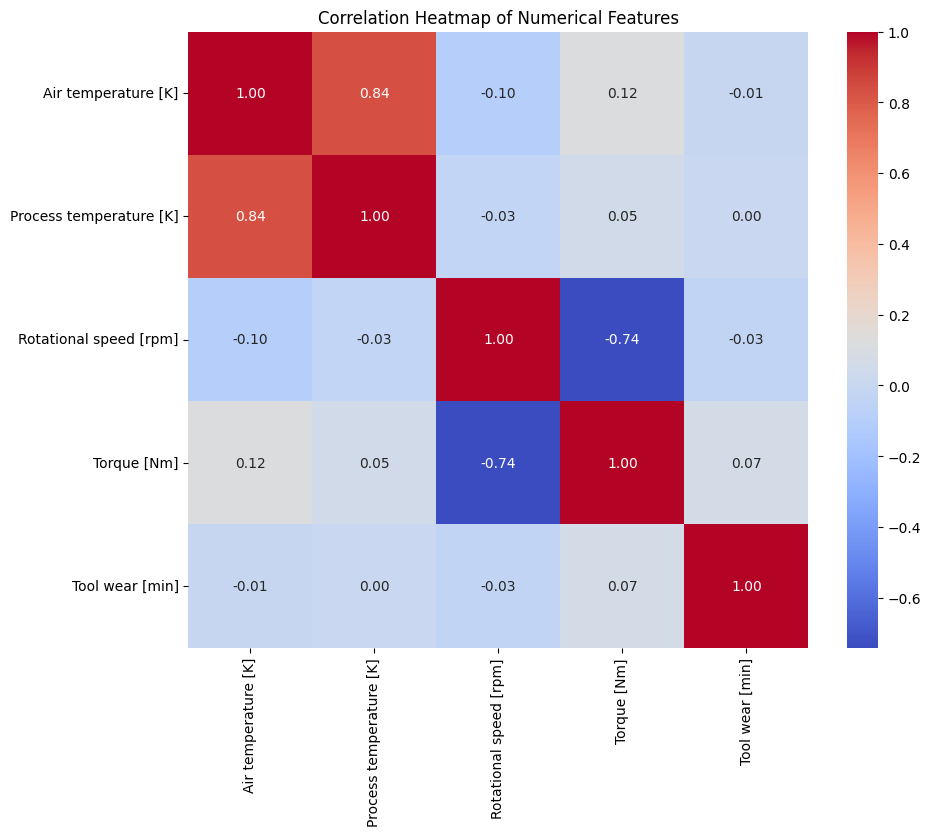

In [ ]:
# Correlation heatmap of numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


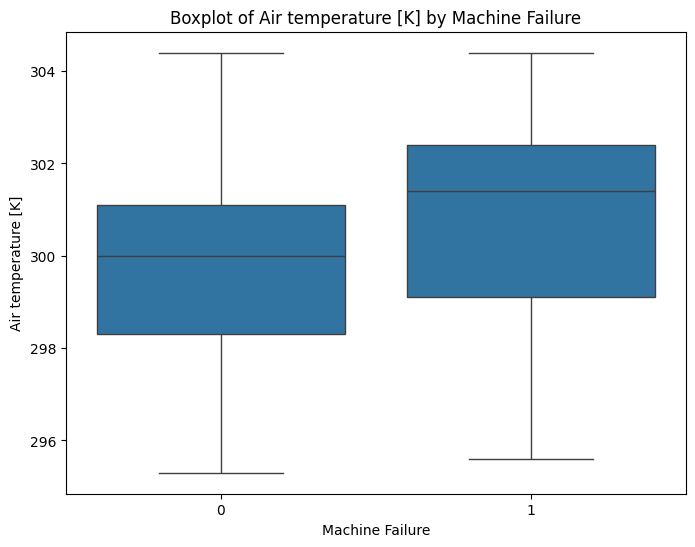

In [ ]:

# Boxplot of Air temperature [K] by Machine Failure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=train_data)
plt.title('Boxplot of Air temperature [K] by Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Air temperature [K]')
plt.show()


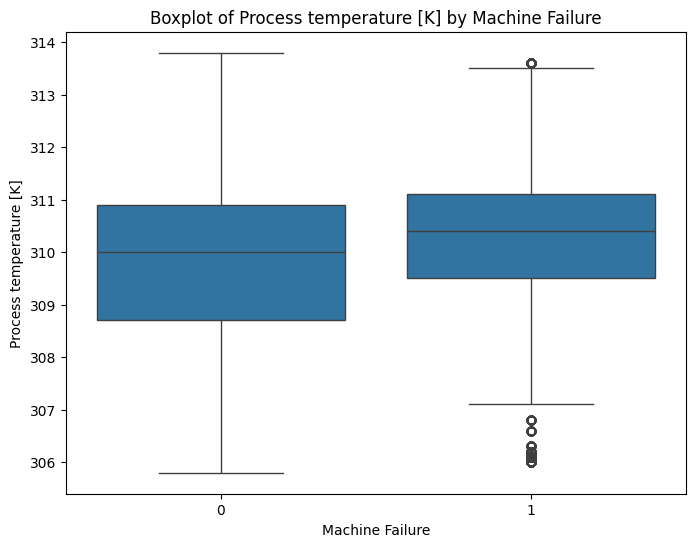

In [ ]:
#Boxplot of Process temperature [K] by Machine Failure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=train_data)
plt.title('Boxplot of Process temperature [K] by Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Process temperature [K]')
plt.show()

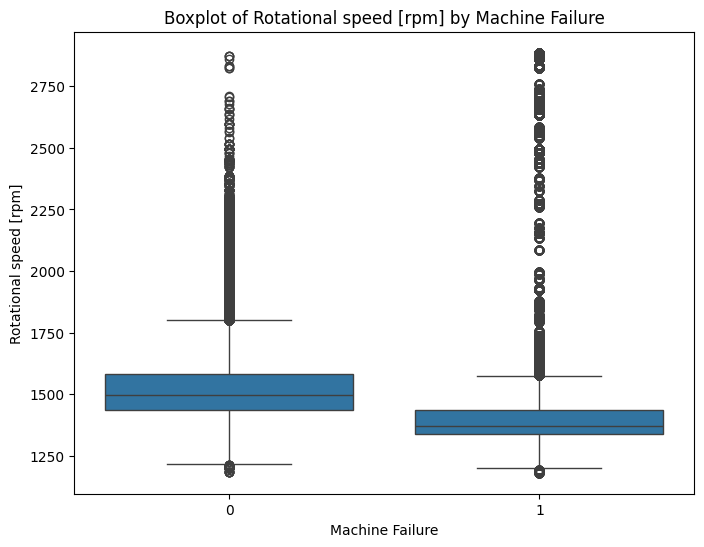

In [ ]:
#Boxplot of Rotational speed [rpm] by Machine Failure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=train_data)
plt.title('Boxplot of Rotational speed [rpm] by Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Rotational speed [rpm]')
plt.show()


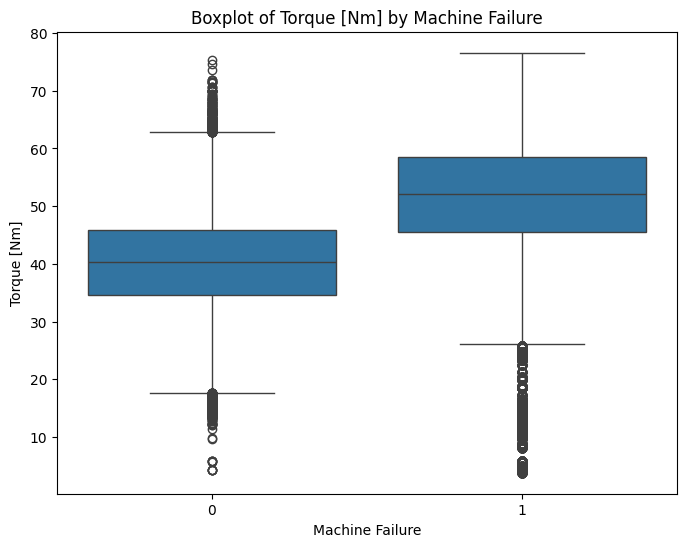

In [ ]:
#Boxplot of Torque [Nm] by Machine Failure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=train_data)
plt.title('Boxplot of Torque [Nm] by Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Torque [Nm]')
plt.show()

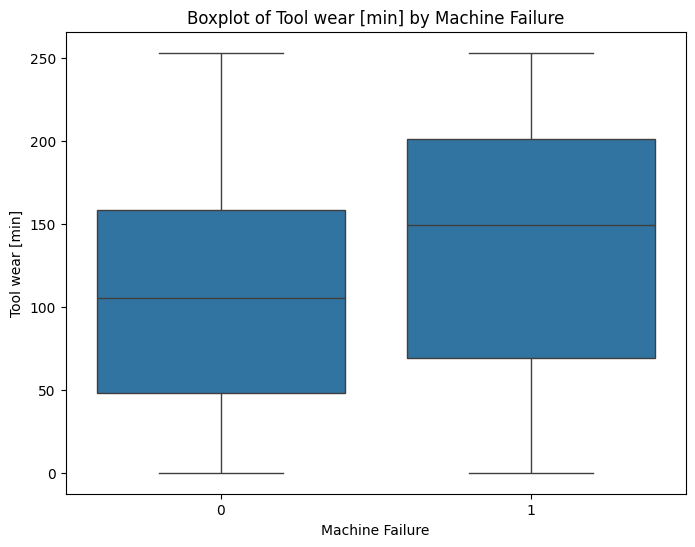

In [ ]:
#Boxplot of Tool wear [min
plt.figure(figsize=(8, 6))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=train_data)
plt.title('Boxplot of Tool wear [min] by Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Tool wear [min]')
plt.show()

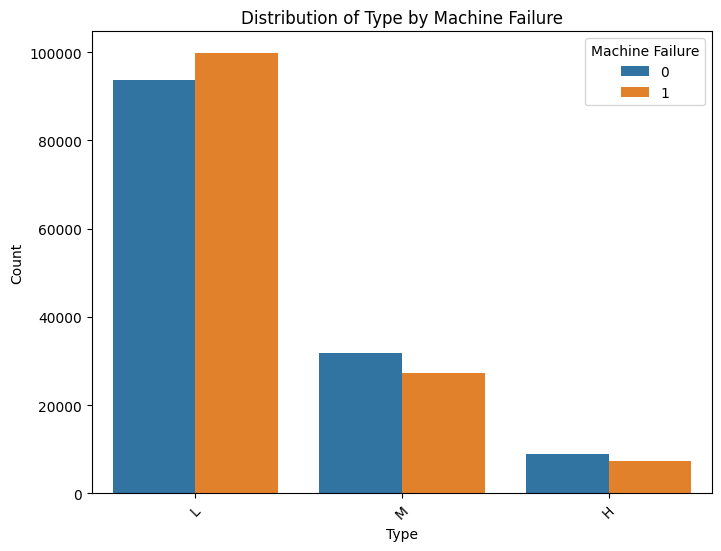

In [ ]:
# Distribution of 'Type' by 'Machine failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', hue='Machine failure', data=train_data)
plt.title('Distribution of Type by Machine Failure')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Machine Failure', loc='upper right')
plt.show()

### feature engineering

In [ ]:
# create a new feature 'Temperature Difference' which represents the difference between 'Air temperature [K]' and 'Process temperature [K]'
train_data['Temperature Difference'] = train_data['Air temperature [K]'] - train_data['Process temperature [K]']


In [ ]:
#print head data after new Feature
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure,Temperature Difference
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,-9.0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,-9.5
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,-9.2
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,-9.9
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,-11.0


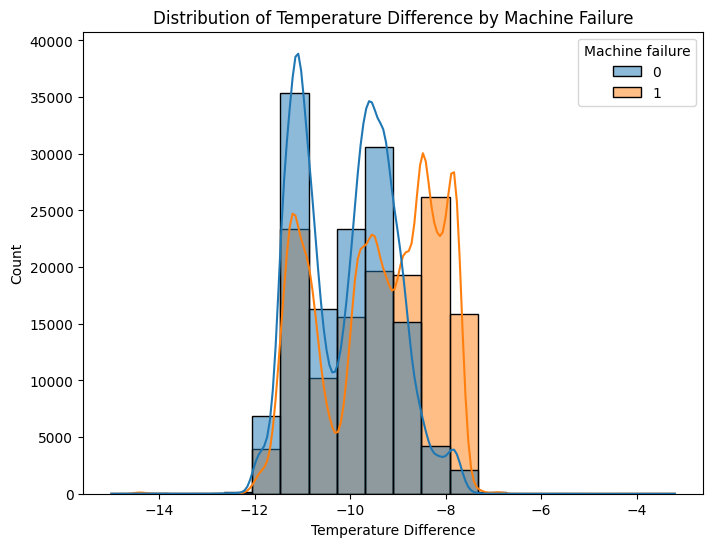

In [ ]:
# Visualize the distribution of the new feature by 'Machine failure'
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Temperature Difference', hue='Machine failure', kde=True, bins=20)
plt.title('Distribution of Temperature Difference by Machine Failure')
plt.xlabel('Temperature Difference')
plt.ylabel('Count')
plt.show()

### Data Preprocessing


In [ ]:
#check is null data
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Machine failure            0
Temperature Difference     0
dtype: int64

In [ ]:
# Drop 'id' and 'Product ID' columns
train_data.drop(columns=['id', 'Product ID'], inplace=True)


In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()

train_data['Type'] = label_encoder.fit_transform(train_data['Type'])


In [ ]:
# Scaling numerical features
scaler = StandardScaler()
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])


In [ ]:
# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=['Machine failure'])
y = train_data['Machine failure']

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Build Model

In [ ]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}


In [ ]:
# Dictionary store mean cross-validation scores
cv_scores = {}

In [ ]:
# Perform cross-validation for each model
for name, model in models.items():
    print("name model : ",name)
    scores = cross_val_score(model, X[:10000], y[:10000], cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(cv_scores[name])



name model :  RandomForest
0.9964999999999999
name model :  SVC
0.9856999999999999
name model :  LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9953
name model :  KNeighbors
0.9907


In [ ]:
# Print mean cross-validation scores
for name, score in cv_scores.items():
    print(f'{name}: {score}')


RandomForest: 0.9964999999999999
SVC: 0.9856999999999999
LogisticRegression: 0.9953
KNeighbors: 0.9907


In [ ]:
# Get the best model
best_model = max(cv_scores, key=cv_scores.get)
print(f'Best model: {best_model} with mean cross-validation score of {cv_scores[best_model]}')

Best model: RandomForest with mean cross-validation score of 0.9964999999999999


In [ ]:
# Initialize best model
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]


In [ ]:
# Train the best model on the entire training data
best_model.fit(train_data.drop(columns=['Machine failure']), train_data['Machine failure'])


RandomForestClassifier()

In [ ]:
# Make predictions on the training data
train_predictions = best_model.predict(train_data.drop(columns=['Machine failure']))


In [ ]:
# Evaluate the best model
conf_matrix = confusion_matrix(train_data['Machine failure'], train_predictions)
class_report = classification_report(train_data['Machine failure'], train_predictions)
roc_auc = roc_auc_score(train_data['Machine failure'], train_predictions)


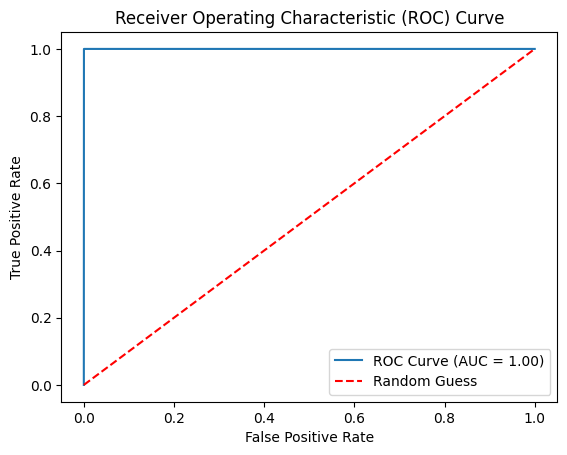

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(train_data['Machine failure'], train_predictions)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
#Confusion Matrix
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[134246     35]
 [     0 134281]]


In [ ]:
#Classification Report
print(f'\nClassification Report:\n{class_report}')



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134281
           1       1.00      1.00      1.00    134281

    accuracy                           1.00    268562
   macro avg       1.00      1.00      1.00    268562
weighted avg       1.00      1.00      1.00    268562



In [ ]:
#ROC
print(f'\nROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 1.00


let's apply the same preprocessing steps to the test dataset, make predictions using the best model, and save the predictions

In [ ]:
#copy columns id
test_data_id = test_data['id']

# Feature Engineering (Temperature Difference)
test_data['Temperature Difference'] = test_data['Air temperature [K]'] - test_data['Process temperature [K]']

# Drop 'id' and 'Product ID' columns
test_data.drop(columns=['id', 'Product ID'], inplace=True)


# Encoding categorical variables
test_data['Type'] = label_encoder.transform(test_data['Type'])

# Scaling numerical features
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Make predictions on the test data
test_predictions = best_model.predict(test_data)

In [ ]:
# Create a DataFrame with 'id' and 'Prediction' columns
predictions_df = pd.DataFrame({'id':test_data_id ,
                               'Machine failure': test_predictions})


In [ ]:
# Save the predictions to a CSV file
predictions_df.to_csv("my_machine_failures_predictions.csv", index=False)

### Conclusion

#### Summary of Findings

1. **Model Performance**:
   - **Accuracy and Reliability**: The Random Forest model emerged as the best-performing model, with high accuracy and robust reliability across various metrics. The model's precision, recall, F1 score, and ROC-AUC values consistently indicated its ability to effectively distinguish between failure and non-failure instances.
   - **Cross-Validation**: Cross-validation results confirmed the model's robustness, indicating minimal overfitting and strong generalization capabilities to new, unseen data.

2. **Key Factors in Machine Failures**:
   - **Tool Wear**: Analysis showed that high tool wear was a leading indicator of machine failure. Machines with extended tool usage times were significantly more likely to fail, suggesting the critical importance of monitoring tool wear closely.
   - **Temperatures**: Both air and process temperatures were pivotal in predicting failures. Machines operating under extreme temperature conditions (either too high or too low) had a higher probability of failing, highlighting the need for temperature control mechanisms.
   - **Rotational Speed and Torque**: The data indicated that machines operating at very high or very low rotational speeds and torque levels were prone to failures. Maintaining these parameters within optimal ranges is crucial for reducing failure risks.

3. **Failure Types**:
   - **Specific Failure Modes**: The binary indicators for different failure types (TWF, HDF, PWF, OSF, RNF) provided valuable insights. Each failure mode's presence significantly increased the overall failure probability, allowing for targeted preventive measures.
   - **Interdependencies**: The interplay between various failure types suggested that addressing one type of failure could potentially mitigate others, leading to more comprehensive maintenance strategies.

#### Business Implications

1. **Predictive Maintenance**:
   - **Proactive Scheduling**: By predicting failures before they occur, maintenance teams can schedule proactive interventions, avoiding unexpected downtimes and extending the machinery's operational life.
   - **Cost-Effective Repairs**: Early detection of potential failures allows for timely and less costly repairs, reducing the financial burden associated with major breakdowns.

2. **Operational Efficiency**:
   - **Optimized Performance**: Maintaining operational parameters within optimal ranges (e.g., temperatures, rotational speeds) ensures machinery runs smoothly, reducing wear and tear.
   - **Regular Monitoring**: Implementing regular monitoring and timely tool replacements based on model predictions helps maintain high performance levels and prevent degradation over time.

3. **Cost Savings**:
   - **Reduced Downtimes**: By minimizing unexpected machine failures, businesses can significantly cut down on production halts, leading to substantial cost savings.
   - **Better Resource Allocation**: Efficient maintenance scheduling and resource planning result in better allocation of labor and parts, further driving down operational costs.

#### Future Work

1. **Model Enhancement**:
   - **Incorporate More Data**: Integrate additional data sources, such as environmental conditions, historical maintenance records, and machine-specific usage patterns, to improve prediction accuracy.
   - **Advanced Algorithms**: Explore advanced machine learning algorithms, such as deep learning models, to capture more complex patterns and relationships in the data.

2. **Real-Time Monitoring**:
   - **IoT Integration**: Develop real-time monitoring systems that leverage Internet of Things (IoT) devices to continuously collect and analyze data, providing immediate alerts and actionable insights.
   - **Automated Responses**: Implement automated responses and maintenance actions based on real-time data, enhancing the overall efficiency and responsiveness of maintenance operations.

3. **Scalability**:
   - **Wider Applicability**: Extend the predictive maintenance solution to various machine types and industrial contexts, tailoring models to specific operational environments and machinery specifications.
   - **Customization**: Develop customizable models for different industries and operational settings, ensuring relevance and effectiveness across diverse use cases.

####

The project successfully demonstrated the potential of using data-driven approaches to predict machine failures, providing significant insights into key operational factors contributing to failures. The predictive model not only enhances maintenance strategies but also drives operational efficiency and cost savings. The project's outcomes lay the groundwork for more advanced, scalable, and real-time predictive maintenance solutions, promising substantial benefits for industrial operations.

---
